In [1]:
pip install spotipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importamos las librerías principales
import math
from scipy.spatial.distance import euclidean
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import spotipy 
sns.set()

In [3]:
#clientID y Clinet Secret
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ="0cbdc493e9df45b0bfa38bf1a7f1fd43"
secret = "6be1132f0fed4f1eafd20d18f9c2fe14"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False

In [4]:
#muestra de 30 segundos y arte de portada. para las 10 mejores pistas de Led Zeppelin

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'
spotify = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret))
results = spotify.artist_top_tracks(lz_uri)

for track in results['tracks'][:50]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/fc80a280376d5142c888475bd8fdcd00b4fc8d7d?cid=0cbdc493e9df45b0bfa38bf1a7f1fd43
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/e5910b86cc788766388cca1c494094e39186aa1e?cid=0cbdc493e9df45b0bfa38bf1a7f1fd43
cover art: https://i.scdn.co/image/ab67616d0000b27390a50cfe99a4c19ff3cbfbdb

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/f3765a6c5b194302c6e7fffc31ba21e2bd616cf6?cid=0cbdc493e9df45b0bfa38bf1a7f1fd43
cover art: https://i.scdn.co/image/ab67616d0000b273fc4f17340773c6c3579fea0d

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/f82af31817a7ec198a709e68f0f0f9edfc9a7e81?cid=0cbdc493e9df45b0bfa38bf1a7f1fd43
cover art: https://i.scdn.co/image/ab67616d0000b273c8a11e48c91a982d086afc69

track    : Kashmir - Remaster
audio    : https://p.scdn.co/mp3

In [5]:
track

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/36QJpDe2go2KgaRleHCDTp'},
    'href': 'https://api.spotify.com/v1/artists/36QJpDe2go2KgaRleHCDTp',
    'id': '36QJpDe2go2KgaRleHCDTp',
    'name': 'Led Zeppelin',
    'type': 'artist',
    'uri': 'spotify:artist:36QJpDe2go2KgaRleHCDTp'}],
  'external_urls': {'spotify': 'https://open.spotify.com/album/7gS8ozSkvPW3VBPLnXOZ7S'},
  'href': 'https://api.spotify.com/v1/albums/7gS8ozSkvPW3VBPLnXOZ7S',
  'id': '7gS8ozSkvPW3VBPLnXOZ7S',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2731816adce1d49e35d3ce9a1d1',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e021816adce1d49e35d3ce9a1d1',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048511816adce1d49e35d3ce9a1d1',
    'width': 64}],
  'name': 'Houses of the Holy (Deluxe Edition)',
  'release_date': '1973-03-28',
  'release_date_

In [6]:
type(results)
type(track)

dict

In [2]:


#Importamos los datos levantados del servidor de GitHub
from pandas import read_csv
data_url = 'https://gist.githubusercontent.com/jackbandy/5cd988ab5c3d95b79219364dce7ee5ae/raw/731ecdbecc7b33030f23cd919e6067dfbaf42feb/song-ratings.csv'
ratings = read_csv(data_url,index_col=0)



In [3]:
from IPython.display import display, HTML
display(HTML(ratings.to_html()))

,One Dance (Drake),Lean On (Major Lazer),Sunflower (Post Malone and Swae Lee),Somebody That I Used To Know (Gotye),Rolling in the Deep (Adele),Can't Hold Us (Macklemore),7 Rings (Ariana Grande),Wake Me Up (Avicii),Love The Way You Lie (Eminem and Rihanna),bad guy (Billie Eilish),Rather Be (Clean Bandit and Jess Glynne),Call Me Maybe (Carly Rae Jepsen),We Are Young (fun.),Shape of You (Ed Sheeran),Closer (The Chainsmokers),Cheerleader (OMI),Radioactive (Imagine Dragons),Señorita (Shawn Mendes and Camila Cabello),Airplanes (B.o.B and Hayley Williams),Want (Birdtalker),Without You (David Guetta and Usher),Half Love (Red Hearse),Old Town Road - Remix (Lil Nas X and Billy Ray Cyrus),Never Really Over (Katy Perry)
First Name (or Alias),,,,,,,,,,,,,,,,,,,,,,,,
Jack,3.0,5.0,5.0,2,4,4,NaN,5.0,2.0,4.0,5.0,5,4.0,2,5.0,2.0,5,2.0,2.0,5.0,5.0,4.0,5,5
Nick,2.0,5.0,5.0,4,5,3,5.0,2.0,3.0,5.0,4.0,5,5.0,1,1.0,2.0,2,3.0,3.0,4.0,3.0,4.0,2,5
Jubilee,5.0,4.0,2.0,3,3,5,4.0,3.0,2.0,5.0,5.0,2,4.0,1,3.0,2.0,5,1.0,5.0,1.0,1.0,1.0,4,5
Jules,5.0,5.0,3.0,3,5,4,3.0,4.0,3.0,5.0,3.0,3,3.0,3,4.0,2.0,3,2.0,3.0,NaN,4.0,NaN,1,5
Trevor,4.0,3.0,2.0,4,3,1,3.0,4.0,3.0,2.0,NaN,1,3.0,4,4.0,1.0,5,4.0,3.0,NaN,NaN,NaN,1,3
Megan,5.0,4.0,4.0,3,3,3,3.0,5.0,4.0,5.0,5.0,4,3.0,4,3.0,2.0,5,3.0,3.0,3.0,4.0,NaN,2,5
Joe,3.0,4.0,5.0,4,5,4,3.0,4.0,3.0,4.0,3.0,4,4.0,4,2.0,4.0,3,3.0,4.0,4.0,3.0,4.0,5,3
Hallie,NaN,NaN,NaN,3,5,3,NaN,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,2,4


<AxesSubplot:ylabel='First Name (or Alias)'>

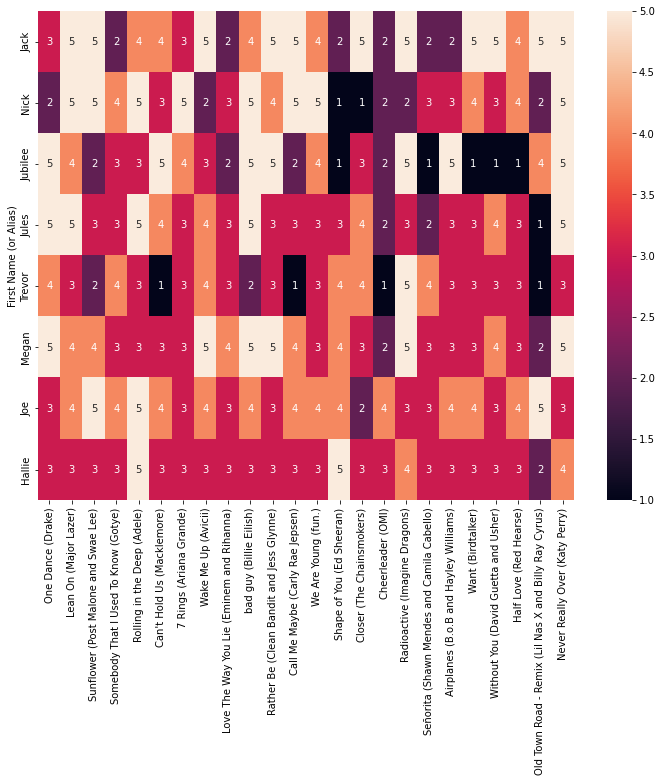

In [4]:
#Ajustamos y ploteamos un mapa de calor para observar los resultados hasta aquí
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
ratings=ratings.fillna(3)
sns.heatmap(ratings, annot=True)

In [5]:
#Utilizo esta función euclidiana del sistema para calcular la similitud entre los usuarios
def eDistance(person1,person2):
  distance = euclidean(person1,person2)
  return distance

In [6]:
#Definir función para calcular similitud entre personas
def most_similar_to(name):
  person = ratings.loc[name]
  closest_distance=float('inf')
  closest_person=''
  for other_person in ratings.itertuples():
    if other_person.Index==name:
      # don't compare a person to themself
      continue
    distance_to_other_person = eDistance(person,ratings.loc[other_person.Index])
    #print(distance_to_other_person)
    if distance_to_other_person < closest_distance:
       # new high score! save it
       closest_distance = distance_to_other_person
       closest_person = other_person.Index
  return closest_person, closest_distance

In [13]:
#Introduzca entre las comillas, el nombre de la persona a la que que quiere encontrar el mas similar
#Las opciones son Hallie, Jack, Joe, Megan, Trevor, Jules, Jubilee y Nick

name='Nick'
closest_person, closest_distance = most_similar_to(name)
print(name,"es más similar a",closest_person,"con una distancia de",closest_distance)

Nick es más similar a Joe con una distancia de 6.6332495807108


In [7]:
#Devuelvo la función con los ítems o canciones más preferidas por el usuario
def preferred_items(name):
    person = ratings.loc[name]
    preferred_items = person[person==5].index.values
    return preferred_items

In [14]:
#Introduzca entre las comillas, el nombre de la persona a la que que quiere encontrar sus canciones preferidas
#Los usuarios son Hallie, Jack, Joe, Megan, Trevor, Jules, Jubilee y Nick

name='Joe'
recommended_items = preferred_items(closest_person)
print("Las canciones preferidas de",name,"son:\n",recommended_items)

Las canciones preferidas de Joe son:
 ['Sunflower (Post Malone and Swae Lee)' 'Rolling in the Deep (Adele)'
 'Old Town Road - Remix (Lil Nas X and Billy Ray Cyrus)']


: 

In [8]:
#Introduzca entre las comillas, el nombre de la persona a la que que quiere encontrar su usuario más similar
#y sus canciones preferidas
#Los usuarios posibles son Hallie, Jack, Joe, Megan, Trevor, Jules, Jubilee y Nick

name='Jules'
closest_person, closest_distance = most_similar_to(name)
recommended_items = preferred_items(closest_person)
print(name,"es más similar a",closest_person,"con una distancia de",closest_distance)
print("Las canciones preferidas de",name,"son:\n",recommended_items)

Jules es más similar a Megan con una distancia de 4.69041575982343
Las canciones preferidas de Jules son:
 ['One Dance (Drake)' 'Wake Me Up (Avicii)' 'bad guy (Billie Eilish)'
 'Rather Be (Clean Bandit and Jess Glynne)'
 'Radioactive (Imagine Dragons)' 'Never Really Over (Katy Perry)']


In [9]:
#Metodo para encontrar el item mas similiar a otro
def most_similar_item_to(item):
    item = ratings.loc[:,item_name]
    closest_distance=float('inf')
    closest_item=''
    for column in ratings:
        if column==item_name:
            continue   
        distance_to_other_item = eDistance(item,ratings.loc[:,column])
        if distance_to_other_item < closest_distance:
         closest_distance = distance_to_other_item
         closest_item = column
    return closest_item, closest_distance

In [10]:
#Tema preferido de Hallie
item_name = "Lean On (Major Lazer)"
closest_item  = most_similar_item_to(item_name)
print(item_name,"es muy similar a",closest_item)

Lean On (Major Lazer) es muy similar a ('bad guy (Billie Eilish)', 2.0)


In [11]:
#Tema preferido de Hallie
item_name = "Rolling in the Deep (Adele)"
closest_item  = most_similar_item_to(item_name)
print(item_name,"es muy similar a",closest_item)


Rolling in the Deep (Adele) es muy similar a ('Lean On (Major Lazer)', 2.8284271247461903)


<AxesSubplot:ylabel='First Name (or Alias)'>

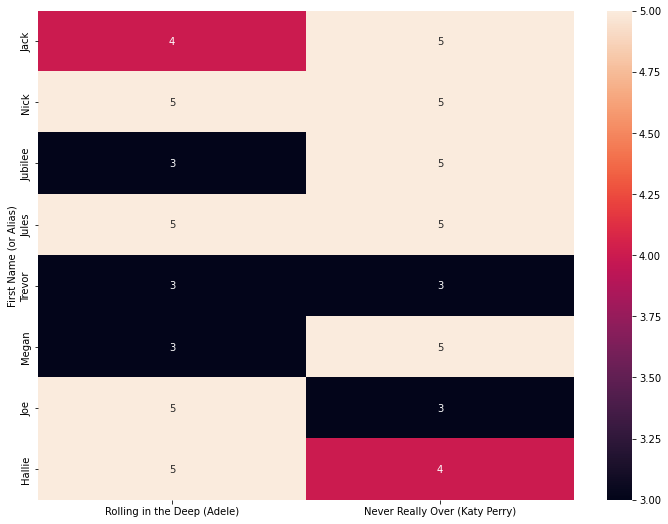

In [12]:
tema1 = ratings.loc[:,"Rolling in the Deep (Adele)"]
tema2 = ratings.loc[:,"Never Really Over (Katy Perry)"]
plt.figure(figsize=(12, 9))
comparativo = pd.concat([tema1, tema2], axis=1)
sns.heatmap(comparativo, annot=True)